In [1]:
from sklearn.metrics import brier_score_loss
from skimage.io import imread
import os
from tifffile import imwrite
from pathlib import Path
import pyclesperanto_prototype as cle
import numpy as np
from skimage.measure import regionprops
from scipy import ndimage
from tqdm import tqdm
import matplotlib.pyplot as plt
import apoc
from natsort import natsorted
import napari
import pandas as pd
import sys

cwd = os.getcwd()
# print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[2])
# print(f"Module dir: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
import seaborn as sns
sns.set_theme(style="darkgrid")

from src.evaluation.evaluate_models import predict_pmaps_and_calculate_brier_scores, get_classifier_metrics_stats_brier, get_classifier_metrics_stats_log
from src.data.preprocess_utils import load_files

In [2]:
# from importlib import reload
# reload(sys.modules['src.evaluation.evaluate_models'])

In [3]:
cle.select_device('RTX')

<NVIDIA GeForce RTX 3070 Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [9]:
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load binary ground truth

In [ ]:
GT_binary, fnames = load_files(os.path.join(module_path, "data", "test_set_binary_for_evaluation"), return_fnames=True)

### Brier Scores

In [8]:
stats0 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07"), 0, fnames, GT_binary))

In [9]:
stats1 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-1"), 1, fnames, GT_binary))

In [10]:
stats2 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-2"), 2, fnames, GT_binary))

In [11]:
stats3 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-3"), 3, fnames, GT_binary))

In [12]:
stats4 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-4"), 4, fnames, GT_binary))

In [13]:
stats5 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-5"), 5, fnames, GT_binary))

In [15]:
stats6 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-6"), 6, fnames, GT_binary))

In [16]:
stats7 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-7"), 7, fnames, GT_binary))

In [17]:
stats8 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-8"), 8, fnames, GT_binary))

In [18]:
stats9 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-9"), 9, fnames, GT_binary))

In [19]:
stats10 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-10"), 10, fnames, GT_binary))

In [20]:
stats11 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-11"), 11, fnames, GT_binary))

In [21]:
stats12 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-12"), 12, fnames, GT_binary))

In [22]:
stats13 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-13"), 13, fnames, GT_binary))

In [23]:
stats14 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-14"), 14, fnames, GT_binary))

In [24]:
stats15 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-15"), 15, fnames, GT_binary))

In [25]:
stats16 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-16"), 16, fnames, GT_binary))

In [26]:
stats17 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-17"), 17, fnames, GT_binary))

In [27]:
stats18 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-18"), 18, fnames, GT_binary))

In [28]:
stats19 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-19"), 19, fnames, GT_binary))

In [29]:
stats20 = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-20"), 20, fnames, GT_binary))

In [12]:
statsneg = pd.DataFrame(get_classifier_metrics_stats_brier(os.path.join(module_path, "experiments", "exp07-neg"), 0, fnames, GT_binary))
statsneg   # if classifier is trained only on raw data

,0
0,0.066886
1,0.066876
2,0.066884
3,0.066881
4,0.066887
5,0.066889
6,0.066892
7,0.066884
8,0.066881
9,0.066871


In [17]:
statsneg.mean()

0    0.066882
dtype: float64

In [31]:
df_brier = pd.concat([stats0,stats1,stats2,stats3,stats4,stats5,stats6,stats7,stats8,stats9,stats10,stats11,stats12,stats13,stats14,stats15,stats16,stats17,stats18,stats19,stats20], axis=1)
df_brier

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.046768,0.056053,0.059726,0.057580,0.045522,0.045104,0.044848,0.045485,0.045492,0.044717,...,0.047516,0.047977,0.045598,0.041030,0.040209,0.043259,0.044888,0.044821,0.039723,0.066886
1,0.045542,0.055989,0.059223,0.057514,0.045089,0.045116,0.044977,0.045439,0.044872,0.044640,...,0.049294,0.047765,0.045125,0.041567,0.040062,0.044009,0.044240,0.044761,0.039622,0.066876
2,0.046319,0.056219,0.058852,0.056855,0.045960,0.045227,0.044994,0.045493,0.044520,0.044885,...,0.048162,0.047820,0.045075,0.041237,0.039903,0.043945,0.044560,0.044572,0.039568,0.066884
3,0.045919,0.056599,0.058943,0.057618,0.045336,0.045505,0.045121,0.045672,0.044799,0.044935,...,0.048332,0.047999,0.045037,0.041447,0.039968,0.043818,0.045039,0.044178,0.040487,0.066881
4,0.046109,0.055731,0.059339,0.057585,0.045695,0.044886,0.044774,0.045560,0.045237,0.044766,...,0.048177,0.047914,0.044603,0.041013,0.040382,0.043865,0.045427,0.044136,0.040383,0.066887
5,0.046414,0.056165,0.058865,0.057433,0.045168,0.045555,0.045300,0.045826,0.045056,0.044919,...,0.048416,0.047946,0.045024,0.040860,0.039973,0.043757,0.045311,0.044614,0.039424,0.066889
6,0.045968,0.056457,0.059013,0.057780,0.045358,0.045429,0.044594,0.045303,0.045285,0.044948,...,0.047297,0.048195,0.044792,0.041797,0.040352,0.044707,0.044879,0.044952,0.040308,0.066892
7,0.045545,0.056239,0.059116,0.057434,0.045191,0.045731,0.044780,0.045605,0.045644,0.044864,...,0.047840,0.048032,0.044736,0.041488,0.040025,0.043940,0.045242,0.044051,0.040007,0.066884
8,0.046113,0.056598,0.059274,0.057836,0.046119,0.045928,0.044744,0.045186,0.045364,0.044688,...,0.048633,0.047947,0.045109,0.042090,0.040163,0.043370,0.045273,0.044784,0.040194,0.066881
9,0.045727,0.056160,0.059401,0.058918,0.045331,0.045939,0.045001,0.045509,0.044763,0.045001,...,0.048511,0.047857,0.045495,0.040696,0.039516,0.043214,0.045154,0.044480,0.039809,0.066871


In [15]:
cl = [x for x in range(21)]
cl

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
df_brier.columns=cl

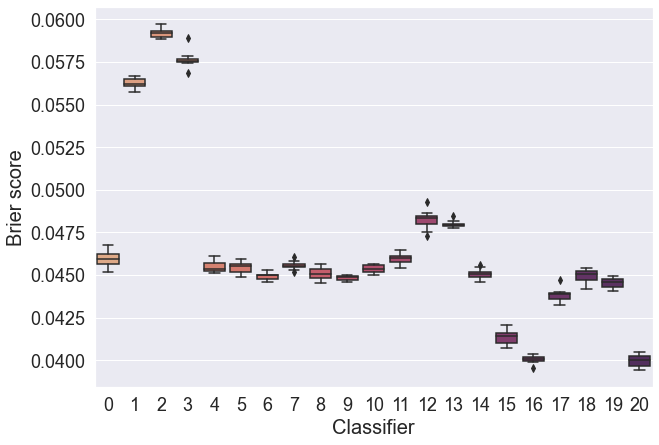

In [10]:
plt.gcf().set_size_inches(10, 7)
#b = df.boxplot()
plt.ylabel("Brier score")
plt.xlabel("Classifier")

sns.boxplot(data=df_brier, palette="flare")  
plt.savefig(os.path.join(module_path, "reports", "figures", "apoc", "brier_scores_clf.png"), bbox_inches='tight')

#### Save the dataframe to disk

In [68]:
df.to_csv(os.path.join(module_path, "notebooks", "results", "APOC_prob_maps", "metrics", "brier_scores_Clf0-20.csv"), sep=",", index=False)

#### Load saved dataframe

In [5]:
df_brier = pd.read_csv(os.path.join(module_path, "notebooks", "results", "APOC_prob_maps", "metrics", "brier_scores_Clf0-20.csv"))

In [6]:
df_brier

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.046768,0.056053,0.059726,0.057580,0.045522,0.045104,0.044848,0.045485,0.045492,0.044717,...,0.045986,0.047516,0.047977,0.045598,0.041030,0.040209,0.043259,0.044888,0.044821,0.039723
1,0.045542,0.055989,0.059223,0.057514,0.045089,0.045116,0.044977,0.045439,0.044872,0.044640,...,0.045597,0.049294,0.047765,0.045125,0.041567,0.040062,0.044009,0.044240,0.044761,0.039622
2,0.046319,0.056219,0.058852,0.056855,0.045960,0.045227,0.044994,0.045493,0.044520,0.044885,...,0.045404,0.048162,0.047820,0.045075,0.041237,0.039903,0.043945,0.044560,0.044572,0.039568
3,0.045919,0.056599,0.058943,0.057618,0.045336,0.045505,0.045121,0.045672,0.044799,0.044935,...,0.046408,0.048332,0.047999,0.045037,0.041447,0.039968,0.043818,0.045039,0.044178,0.040487
4,0.046109,0.055731,0.059339,0.057585,0.045695,0.044886,0.044774,0.045560,0.045237,0.044766,...,0.045670,0.048177,0.047914,0.044603,0.041013,0.040382,0.043865,0.045427,0.044136,0.040383
5,0.046414,0.056165,0.058865,0.057433,0.045168,0.045555,0.045300,0.045826,0.045056,0.044919,...,0.046232,0.048416,0.047946,0.045024,0.040860,0.039973,0.043757,0.045311,0.044614,0.039424
6,0.045968,0.056457,0.059013,0.057780,0.045358,0.045429,0.044594,0.045303,0.045285,0.044948,...,0.046027,0.047297,0.048195,0.044792,0.041797,0.040352,0.044707,0.044879,0.044952,0.040308
7,0.045545,0.056239,0.059116,0.057434,0.045191,0.045731,0.044780,0.045605,0.045644,0.044864,...,0.046051,0.047840,0.048032,0.044736,0.041488,0.040025,0.043940,0.045242,0.044051,0.040007
8,0.046113,0.056598,0.059274,0.057836,0.046119,0.045928,0.044744,0.045186,0.045364,0.044688,...,0.045808,0.048633,0.047947,0.045109,0.042090,0.040163,0.043370,0.045273,0.044784,0.040194
9,0.045727,0.056160,0.059401,0.058918,0.045331,0.045939,0.045001,0.045509,0.044763,0.045001,...,0.045875,0.048511,0.047857,0.045495,0.040696,0.039516,0.043214,0.045154,0.044480,0.039809


### Log losses

In [117]:
stats0 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07"), 0, fnames, GT_binary))

In [118]:
stats1 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-1"), 1, fnames, GT_binary))

In [119]:
stats2 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-2"), 2, fnames, GT_binary))

In [120]:
stats3 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-3"), 3, fnames, GT_binary))

In [121]:
stats4 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-4"), 4, fnames, GT_binary))

In [122]:
stats5 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-5"), 5, fnames, GT_binary))

In [123]:
stats6 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-6"), 6, fnames, GT_binary))

In [124]:
stats7 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-7"), 7, fnames, GT_binary))

In [125]:
stats8 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-8"), 8, fnames, GT_binary))

In [126]:
stats9 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-9"), 9, fnames, GT_binary))

In [127]:
stats10 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-10"), 10, fnames, GT_binary))

In [128]:
stats11 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-11"), 11, fnames, GT_binary))

In [129]:
stats12 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-12"), 12, fnames, GT_binary))

In [130]:
stats13 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-13"), 13, fnames, GT_binary))

In [131]:
stats14 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-14"), 14, fnames, GT_binary))

In [132]:
stats15 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-15"), 15, fnames, GT_binary))

In [133]:
stats16 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-16"), 16, fnames, GT_binary))

In [134]:
stats17 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-17"), 17, fnames, GT_binary))

In [135]:
stats18 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-18"), 18, fnames, GT_binary))

In [136]:
stats19 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-19"), 19, fnames, GT_binary))

In [137]:
stats20 = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-20"), 20, fnames, GT_binary))

In [16]:
statsneglog = pd.DataFrame(get_classifier_metrics_stats_log(os.path.join(module_path, "experiments", "exp07-neg"), 0, fnames, GT_binary))
statsneglog  # if classifier is trained only on raw data

,0
0,0.198240
1,0.198273
2,0.198132
3,0.198293
4,0.198198
5,0.198289
6,0.198244
7,0.198300
8,0.198305
9,0.198157


In [18]:
statsneglog.mean()

0    0.198246
dtype: float64

In [149]:
cl = [x for x in range(21)]

In [ ]:
df_log = pd.concat([stats0,stats1,stats2,stats3,stats4,stats5,stats6,stats7,stats8,stats9,stats10,stats11,stats12,stats13,stats14,stats15,stats16,stats17,stats18,stats19,stats20], axis=1)

In [151]:
df_log.columns=cl
df_log

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.185536,0.215539,0.220574,0.209731,0.181952,0.180659,0.181579,0.178924,0.184497,0.182783,...,0.181211,0.178811,0.184119,0.173423,0.150419,0.142353,0.167808,0.174200,0.176825,0.163374
1,0.184528,0.215827,0.216389,0.211020,0.180677,0.180551,0.182099,0.179886,0.182330,0.180554,...,0.179322,0.184934,0.184609,0.171901,0.153378,0.144538,0.171840,0.171207,0.176216,0.166635
2,0.186084,0.216103,0.215384,0.201038,0.182388,0.180631,0.181549,0.179938,0.180982,0.181783,...,0.180064,0.183529,0.184680,0.170028,0.156529,0.141684,0.171314,0.172252,0.175623,0.166019
3,0.184679,0.217266,0.217088,0.209326,0.182179,0.182664,0.183107,0.179259,0.183160,0.180062,...,0.182307,0.188335,0.183821,0.172541,0.158574,0.143359,0.173549,0.172649,0.176446,0.165995
4,0.184379,0.211697,0.215619,0.206067,0.181381,0.180104,0.181403,0.180476,0.183953,0.181944,...,0.181309,0.181009,0.184413,0.169735,0.151625,0.144619,0.170365,0.174303,0.175841,0.166738
5,0.185147,0.218255,0.222109,0.209708,0.179642,0.182346,0.181890,0.179439,0.183448,0.180857,...,0.181988,0.185316,0.183485,0.169285,0.153051,0.144135,0.170574,0.175643,0.175358,0.165345
6,0.182739,0.218276,0.218523,0.209308,0.180782,0.179299,0.181106,0.178823,0.183818,0.182633,...,0.180875,0.179236,0.185460,0.169938,0.155295,0.145457,0.170406,0.176569,0.177719,0.167333
7,0.182186,0.217496,0.216098,0.207351,0.180838,0.181741,0.181229,0.179349,0.183714,0.183320,...,0.180732,0.182813,0.185907,0.171073,0.154753,0.143757,0.169555,0.174079,0.174812,0.164858
8,0.185479,0.219054,0.218885,0.212972,0.184621,0.181271,0.181720,0.178003,0.183175,0.180100,...,0.182288,0.184799,0.183252,0.170144,0.159491,0.143613,0.168332,0.173171,0.177604,0.167640
9,0.182832,0.215388,0.220686,0.217748,0.180887,0.181833,0.181322,0.179321,0.182230,0.181692,...,0.181981,0.185013,0.183997,0.172581,0.152661,0.141944,0.170797,0.175079,0.177399,0.167171


In [152]:
df_log.to_csv(os.path.join(module_path, "notebooks", "results", "APOC_prob_maps", "metrics", "log_losses_Clf0-20.csv"), sep=",", index=False)

In [12]:
df_log = pd.read_csv(os.path.join(module_path, "notebooks", "results", "APOC_prob_maps", "metrics", "log_losses_Clf0-20.csv"))

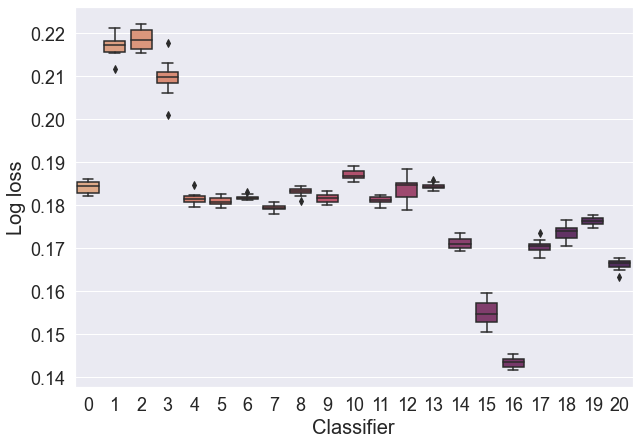

In [13]:
plt.gcf().set_size_inches(10, 7)

plt.ylabel("Log loss")
plt.xlabel("Classifier")

sns.boxplot(data=df_log, palette="flare")  
plt.savefig(os.path.join(module_path, "reports", "figures", "apoc", "log_losses_clf.png"), bbox_inches='tight')

### Sort classifiers from best to worst

In [14]:
df_brier.mean().sort_values()

20    0.039961
16    0.040056
15    0.041351
17    0.043801
19    0.044528
9     0.044811
6     0.044921
18    0.044928
14    0.045072
8     0.045091
10    0.045362
5     0.045455
4     0.045503
7     0.045556
11    0.045955
0     0.045963
13    0.047994
12    0.048227
1     0.056263
3     0.057644
2     0.059191
dtype: float64

In [15]:
df_log.mean().sort_values()

16    0.143451
15    0.154904
20    0.166155
17    0.170388
14    0.171104
18    0.173598
19    0.176353
7     0.179460
5     0.181004
11    0.181257
4     0.181533
9     0.181630
6     0.181782
8     0.183149
12    0.183536
0     0.184230
13    0.184365
10    0.187076
3     0.209558
1     0.216915
2     0.218400
dtype: float64